<a href="https://colab.research.google.com/github/Shiwani9693/Ybi_Project1/blob/main/Ybi_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Customer Churn Model**

**OBJECTIVE**

**DATA SOURCE**

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORT DATASET**

In [2]:
#upload the dataset from local device
from google.colab import files
uploaded = files.upload()

Saving Bank Churn Modelling (1).csv to Bank Churn Modelling (1).csv


In [3]:
#load the dataset
df = pd.read_csv('Bank Churn Modelling (1).csv')

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.duplicated('CustomerId').sum()

0

In [7]:
df=df.set_index('CustomerId')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Encoding**

In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df.replace({'Geography':{'France':0,'Germany':1,'Spain':2}},inplace=True)

<ipython-input-10-97155f130144>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':0,'Germany':1,'Spain':2}},inplace=True)


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

<ipython-input-12-5f8e7ce431e1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Female':0,'Male':1}},inplace=True)


In [13]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [14]:
df.replace({'Num Of Products':{1:0,2:1,3:2,4:3}},inplace=True)

In [15]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [16]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [17]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [18]:
df['Zero Balance']=np.where(df['Balance']==0,1,0)

<Axes: >

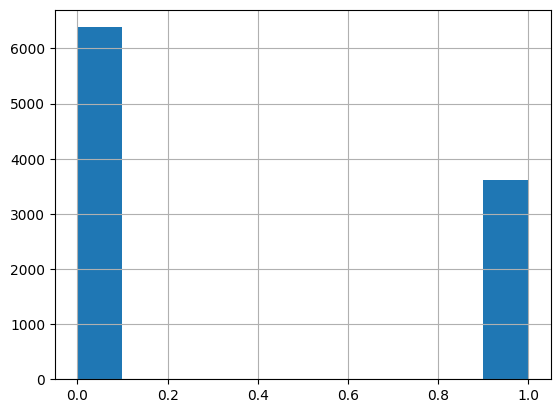

In [19]:
df['Zero Balance'].hist()

In [20]:
df.groupby('Churn')['Geography'].value_counts()

Churn  Geography
0      0            4204
       2            2064
       1            1695
1      1             814
       0             810
       2             413
Name: count, dtype: int64

**Define Label and Features**

In [21]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [22]:
X = df.drop(['Surname','Churn'], axis=1)

In [23]:
y = df['Churn']

In [24]:
X.shape,y.shape

((10000, 11), (10000,))

**Handling Imbalance Data**

Imbalanced data occurs when the distribution of classes in a dataset is not uniform, i.e., one class significantly outnumbers the others. This
imbalance can lead to biased models that perform well on the majority class but poorly on the minority class.

Strategies to Handle Imbalanced Data: Resampling Techniques:

Oversampling: Increasing the instances of the minority class (e.g., using SMOTE - Synthetic Minority Oversampling Technique). Undersampling:
Reducing the instances of the majority class. Using Appropriate Evaluation Metrics: Metrics like precision, recall, F1-score, AUC-ROC, and
confusion matrix are better suited than accuracy for imbalanced datasets

Cost-Sensitive Learning: Assign higher penalties for misclassifying the minority class to make the model more sensitive to it.
Ensemble Methods: Techniques like Random Forests and Gradient Boosting can handle imbalanced data better due to their internal
mechanisms

Class Weights: Many machine learning algorithms allow specifying class weights to give more importance to the minority class.


Example: Suppose we have a dataset for credit card fraud detection, where 99% of transactions are legitimate (non-fraud) and only 1% are
fraudulent. If we train a classifier on this dataset without handling the imbalance, it might predict all transactions as legitimate, achieving high
accuracy but failing to detect fraud.

**Oversampling**

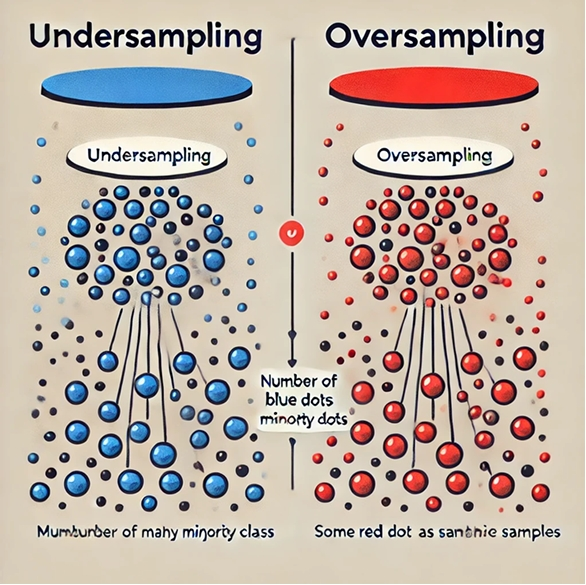

Example: Use SMOTE to synthetically create samples of the fraudulent class. Evaluation Metric Example: Use AUC-ROC to evaluate the model
instead of accuracy. Class Weights: In an SVM model, set class_weight='balanced' to adjust weights automatically based on class frequencies.
By applying these techniques, the model becomes more effective at detecting fraudulent transactions, ensuring balanced performance across
all classes.


**Undersampling:** Undersampling involves reducing the number of samples in the majority class to balance the dataset. By discarding some
majority class samples, it equalizes the class distribution but risks losing valuable information.

Advantage: Simpler and faster as it reduces dataset size. Disadvantage: Can result in loss of significant data, potentially leading to underfitting.
Oversampling: Oversampling increases the number of samples in the minority class to match the majority class. This can be done by
duplicating existing samples or creating synthetic samples using techniques like SMOTE (Synthetic Minority Oversampling Technique).


Advantage: Preserves all data from the majority class. Disadvantage: Can lead to overfitting if the minority class is simply duplicated without
generating diverse synthetic samples

In [25]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


<Axes: xlabel='Churn', ylabel='count'>

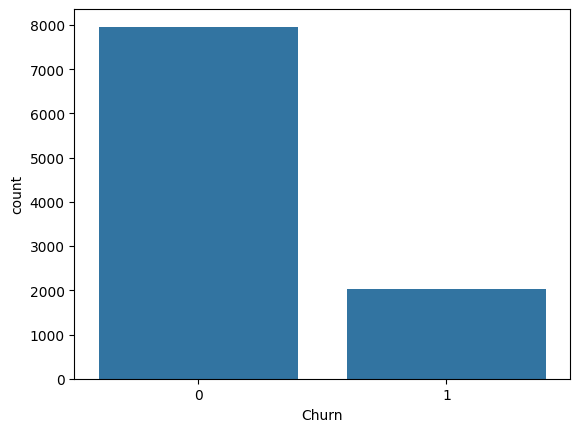

In [26]:
sns.countplot(x='Churn',data=df)

In [27]:
X.shape,y.shape

((10000, 11), (10000,))

**Random Undersampling**

In [29]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2529)
X_rus, y_rus = rus.fit_resample(X,y)

In [30]:
X_rus.shape, y_rus.shape, X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [31]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [32]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

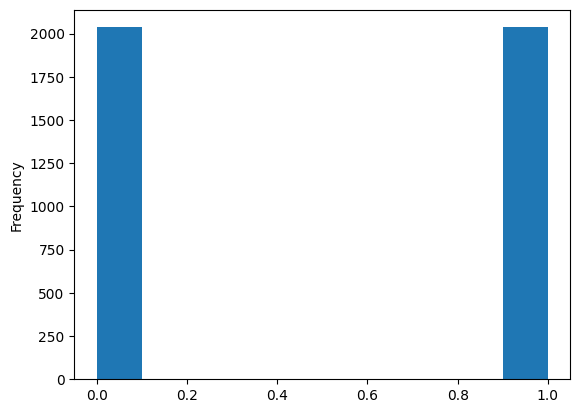

In [33]:
y_rus.plot(kind='hist')

**Random Oversampling**

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2529)
X_ros, y_ros = rus.fit_resample(X,y)

In [35]:
X_ros.shape, y_ros.shape, X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [36]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [37]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

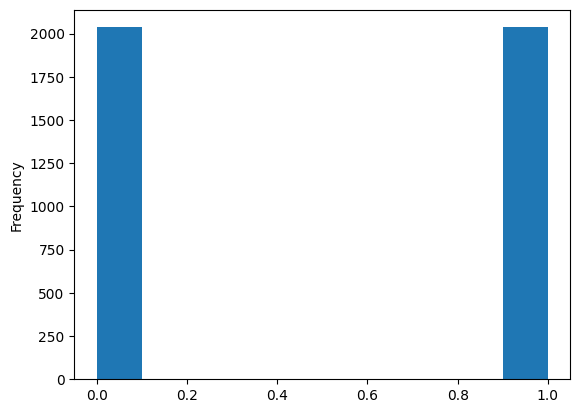

In [38]:
y_ros.plot(kind='hist')

**TrainTestSplit**

In [39]:
from sklearn.model_selection import train_test_split

**Split Original DataSet**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2529)

**Split Random under Sample data**

In [41]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus,y_rus, test_size=0.3, random_state=2529)

**Split Random Over Sample Data**

In [42]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros, test_size=0.3, random_state=2529)

**Standarize Feature**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Standarize Original Data**

In [45]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = scaler.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = scaler.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Standarize the Random under Sampling**

In [47]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = scaler.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = scaler.transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Standarize the Random Over Sampling**

In [49]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = scaler.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = scaler.transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Support Vector Machine Classifier**

In [50]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [51]:
y_pred_svc = svc.predict(X_test)

**Model Accuracy**

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
confusion_matrix(y_test, y_pred_svc)

array([[2375,   39],
       [ 401,  185]])

In [54]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2414
           1       0.83      0.32      0.46       586

    accuracy                           0.85      3000
   macro avg       0.84      0.65      0.69      3000
weighted avg       0.85      0.85      0.83      3000



**HyperParameter Tuning**

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'], 'class_weight': ['balanced']}

In [57]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   2.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gam

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=2)

In [58]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [59]:
grid_prediction = grid.predict(X_test)

In [60]:
confusion_matrix(y_test, grid_prediction)

array([[2116,  298],
       [ 270,  316]])

In [61]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2414
           1       0.51      0.54      0.53       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000



**Model with Random underSampling**

In [62]:
svc_rus = SVC()

In [63]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [64]:
y_pred_svc_rus = svc_rus.predict(X_test_rus)
confusion_matrix(y_test_rus, y_pred_svc_rus)

array([[492, 135],
       [180, 416]])

In [65]:
print(classification_report(y_test_rus, y_pred_svc_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       627
           1       0.75      0.70      0.73       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



**HyperParameter Tuning**

In [66]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'], 'class_weight': ['balanced']}

In [67]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gam

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=2)

In [68]:
print(grid_rus.best_estimator_)

SVC(C=100, class_weight='balanced', gamma=0.01)


In [70]:
grid_prediction_rus = grid_rus.predict(X_test_rus)

In [71]:
confusion_matrix(y_test_rus, grid_prediction_rus)

array([[495, 132],
       [171, 425]])

In [72]:
print(classification_report(y_test_rus, grid_prediction_rus))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       627
           1       0.76      0.71      0.74       596

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



**Model with Random OverSampling**

In [73]:
svc_ros = SVC()

In [74]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [75]:
y_pred_svc_ros = svc_ros.predict(X_test_ros)

**Model Accuracy**

In [76]:
confusion_matrix(y_test_ros, y_pred_svc_ros)

array([[492, 135],
       [180, 416]])

In [77]:
print(classification_report(y_test_ros, y_pred_svc_ros))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       627
           1       0.75      0.70      0.73       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



**HyperPrameter Tuning**

In [78]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'], 'class_weight': ['balanced']}

In [79]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv = 2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gam

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=2)